# Importing Libraries

In [1]:
# ignore warning
import warnings
warnings.filterwarnings('ignore')

# data manipulation
import numpy as np
import pandas as pd

# data visulization
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

# Basic Operations

In [52]:
df = pd.read_csv("xalan-2.4.csv")
df.head()

,name,version,name.1,wmc,dit,noc,cbo,rfc,lcom,ca,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
0,xalan,2.4.0,org.apache.xalan.xsltc.runtime.output.SAXXMLOu...,16,3,0,6,52,112,1,...,1.000,0,0.740000,0.344444,2,8,30.625000,1,0.8125,0
1,xalan,2.4.0,org.apache.xpath.operations.Operation,12,2,14,23,23,0,17,...,1.000,2,0.731707,0.218750,1,7,11.250000,5,1.5833,0
2,xalan,2.4.0,org.apache.xalan.xsltc.runtime.BasisLibrary,53,1,0,34,150,1362,22,...,0.375,0,0.000000,0.125000,0,0,37.962264,49,4.3962,1
3,xalan,2.4.0,org.apache.xpath.objects.XString,49,3,2,43,100,1176,34,...,0.000,1,0.606838,0.122222,3,21,14.142857,16,1.8571,0
4,xalan,2.4.0,org.apache.xalan.xsltc.StripFilter,1,1,0,5,1,0,5,...,0.000,0,0.000000,1.000000,0,0,0.000000,1,1.0000,0


In [7]:
df = df.drop(columns=['name', 'version', 'name.1'])

In [11]:
df.shape

(723, 21)

In [11]:
df.drop_duplicates()
df.shape

(745, 21)

# Data Pre Processing

In [12]:
# Null Values Filling

for col in df.columns:
    # Convert to numeric with coerce, setting non-numeric values to NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')

    # Calculate the mode of the numerical values
    mode_value = df[col].mode()[0]

    # Replace NaN values with the mode value
    df[col].fillna(mode_value, inplace=True)

In [13]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df.loc[df['bug'] >= 1, 'bug'] = 1


df['bug'] = le.fit_transform(df['bug'])

df.head()

# True = 0
# False = 1

"""
false = 0
true = 1
"""

'\nfalse = 0\ntrue = 1\n'

In [16]:
df

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
0,16,3,0,6,52,112,1,5,11,0.777778,...,1.000,0,0.740000,0.344444,2,8,30.625000,1,0.8125,0
1,12,2,14,23,23,0,17,8,12,0.363636,...,1.000,2,0.731707,0.218750,1,7,11.250000,5,1.5833,0
2,53,1,0,34,150,1362,22,15,49,1.001603,...,0.375,0,0.000000,0.125000,0,0,37.962264,49,4.3962,1
3,49,3,2,43,100,1176,34,12,46,1.000000,...,0.000,1,0.606838,0.122222,3,21,14.142857,16,1.8571,0
4,1,1,0,5,1,0,5,1,1,2.000000,...,0.000,0,0.000000,1.000000,0,0,0.000000,1,1.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,1,1,0,1,1,0,0,1,1,2.000000,...,0.000,0,0.000000,1.000000,0,0,0.000000,1,1.0000,0
719,4,4,0,19,17,0,0,19,4,0.666667,...,1.000,2,0.969697,0.375000,3,8,19.500000,2,1.0000,0
720,9,2,0,5,24,0,1,4,9,0.625000,...,1.000,2,0.555556,0.288889,1,5,10.444444,3,1.2222,0
721,1,5,3,7,2,0,6,1,0,2.000000,...,0.000,0,1.000000,1.000000,0,0,3.000000,0,0.0000,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745 entries, 0 to 744
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   wmc     745 non-null    int64  
 1   dit     745 non-null    int64  
 2   noc     745 non-null    int64  
 3   cbo     745 non-null    int64  
 4   rfc     745 non-null    int64  
 5   lcom    745 non-null    int64  
 6   ca      745 non-null    int64  
 7   ce      745 non-null    int64  
 8   npm     745 non-null    int64  
 9   lcom3   745 non-null    float64
 10  loc     745 non-null    int64  
 11  dam     745 non-null    float64
 12  moa     745 non-null    int64  
 13  mfa     745 non-null    float64
 14  cam     745 non-null    float64
 15  ic      745 non-null    int64  
 16  cbm     745 non-null    int64  
 17  amc     745 non-null    float64
 18  max_cc  745 non-null    int64  
 19  avg_cc  745 non-null    float64
 20  bug     745 non-null    int64  
dtypes: float64(6), int64(15)
memory usage: 

In [17]:
X = df.iloc[:, :-1]
y = df['bug']

In [18]:
# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Checking Data is Balanced or Not

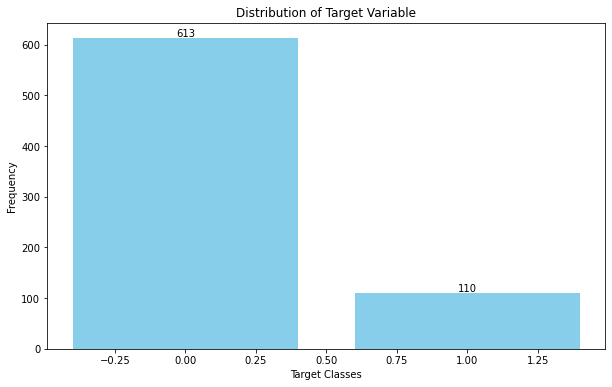

In [19]:
target_counts = df['bug'].value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(target_counts.index, target_counts.values, color='skyblue')

plt.title('Distribution of Target Variable')
plt.xlabel('Target Classes')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

# Add numbers on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.show()

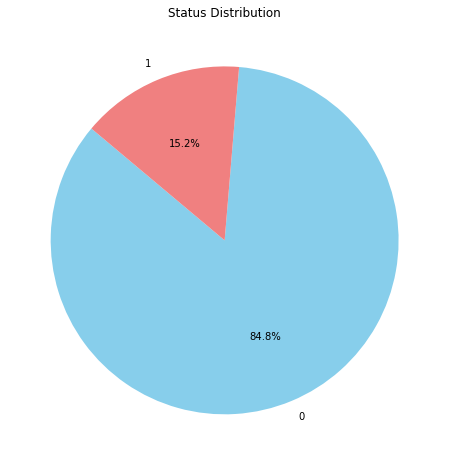

In [21]:
status_counts = y.value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Status Distribution')
plt.show()

# Modeling with Imbalanced Data

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

# Logistic Regression
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
accuracy11 = accuracy_score(y_test, y_pred)
print(f'{model1} Accuracy: {accuracy11 * 100:.2f}%')

# K-Nearest Neighbors
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
accuracy21 = accuracy_score(y_test, y_pred)
print(f'{model2} Accuracy: {accuracy21 * 100:.2f}%')

# Deision Tree
model3 = DecisionTreeClassifier()
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)
accuracy31 = accuracy_score(y_test, y_pred)
print(f'{model3} Accuracy: {accuracy31 * 100:.2f}%')

# Random Forest
model4 = RandomForestClassifier()
model4.fit(X_train, y_train)
y_pred = model4.predict(X_test)
accuracy41 = accuracy_score(y_test, y_pred)
print(f'{model4} Accuracy: {accuracy41 * 100:.2f}%')

# SVM
model5 = SVC(kernel='linear')
model5.fit(X_train, y_train)
y_pred = model5.predict(X_test)
accuracy51 = accuracy_score(y_test, y_pred)
print(f'{model5} Accuracy: {accuracy51 * 100:.2f}%')

# Ensemble Model
ensemble_model = VotingClassifier(estimators=[
    ('log_reg', model1),
    # ('dtree', model3),
    ('Random Forest', model4),
    # ('SVM', model5),
    ('KNN', model2)
], voting='soft') 
ensemble_model.fit(X_train, y_train)
y_pred = ensemble_model.predict(X_test)
accuracy61 = accuracy_score(y_test, y_pred)
print(f'Ensemble Model Accuracy: {accuracy61 * 100:.2f}%')

LogisticRegression() Accuracy: 84.83%
KNeighborsClassifier() Accuracy: 83.45%
DecisionTreeClassifier() Accuracy: 80.00%
RandomForestClassifier() Accuracy: 84.14%
SVC(kernel='linear') Accuracy: 86.21%
Ensemble Model Accuracy: 85.52%


In [ ]:
model2 = KNeighborsClassifier()
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
accuracy21 = accuracy_score(y_test, y_pred)
print(f'{model2} Accuracy: {accuracy21 * 100:.2f}%')

# Solving Imabalanced Data

## 1- Random Under Sampling

In [23]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X,y)

X1 = X_resampled
y1 = y_resampled

# Converting numpy to pandas
X_names = df.columns[:20]
X1 = pd.DataFrame(X1, columns=X_names)
y1 = pd.DataFrame(y1, columns=['bug'])

df1 = pd.concat([X1, y1], axis=1)
df1.head()

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
0,-0.580301,-1.027237,-0.233430,-0.232689,-0.452616,-0.225585,-0.288478,-0.046076,-0.542694,-1.573797,...,1.169949,-0.484578,-1.245500,0.454907,-0.847616,-0.671338,0.631439,-0.521927,-0.665643,0
1,-0.518890,1.597117,-0.233430,0.129438,0.079484,-0.223851,-0.349250,0.754236,-0.542694,-0.869062,...,1.169949,-0.484578,0.988240,1.100236,0.073927,0.858443,0.823052,-0.521927,-0.796715,0
2,-0.273248,0.284940,0.917272,0.077706,-0.256579,-0.225585,0.197698,0.053963,-0.183383,-0.986518,...,1.169949,0.583562,0.878548,-0.420895,0.995471,0.202822,-0.195493,-0.212748,-0.160148,0
3,2.121767,-1.027237,-0.233430,-0.594816,0.639589,1.524205,-0.288478,-0.746349,2.547382,-0.211309,...,-0.948755,-0.484578,-1.245500,-1.067226,-0.847616,-0.671338,-0.606592,-0.521927,-0.289568,0
4,-0.457479,-1.027237,-0.233430,-0.284421,-0.060542,-0.222117,-0.288478,-0.046076,-0.542694,-1.103974,...,-0.948755,0.049492,-1.245500,0.454907,-0.847616,-0.671338,2.416121,-0.521927,-0.469075,0


bug
0      110
1      110
Name: count, dtype: int64


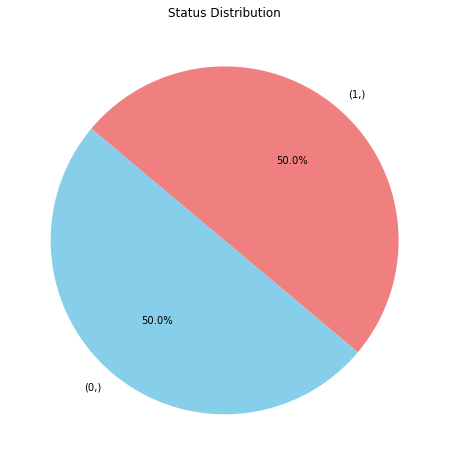

In [26]:
# Distribution after Random Under Sampling
status_counts = y1.value_counts()
print(status_counts)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Status Distribution')
plt.show()

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size=0.2, random_state=0)

# Logistic Regression
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
accuracy12 = accuracy_score(y_test, y_pred)
print(f'{model1} Accuracy: {accuracy12 * 100:.2f}%')

# K-Nearest Neighbors
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
accuracy22 = accuracy_score(y_test, y_pred)
print(f'{model2} Accuracy: {accuracy22 * 100:.2f}%')

# Deision Tree
model3 = DecisionTreeClassifier()
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)
accuracy32 = accuracy_score(y_test, y_pred)
print(f'{model3} Accuracy: {accuracy32 * 100:.2f}%')

# Random Forest
model4 = RandomForestClassifier()
model4.fit(X_train, y_train)
y_pred = model4.predict(X_test)
accuracy42 = accuracy_score(y_test, y_pred)
print(f'{model4} Accuracy: {accuracy42 * 100:.2f}%')

# SVM
model5 = SVC(kernel='linear')
model5.fit(X_train, y_train)
y_pred = model5.predict(X_test)
accuracy52 = accuracy_score(y_test, y_pred)
print(f'{model5} Accuracy: {accuracy52 * 100:.2f}%')

# Ensemble Model
ensemble_model = VotingClassifier(estimators=[
    ('log_reg', model1),
    ('Random Forest', model4),
    ('KNN', model2)
], voting='soft') 
ensemble_model.fit(X_train, y_train)
y_pred = ensemble_model.predict(X_test)
accuracy62 = accuracy_score(y_test, y_pred)
print(f'Ensemble Model Accuracy: {accuracy62 * 100:.2f}%')

LogisticRegression() Accuracy: 70.45%
KNeighborsClassifier() Accuracy: 59.09%
DecisionTreeClassifier() Accuracy: 65.91%
RandomForestClassifier() Accuracy: 77.27%
SVC(kernel='linear') Accuracy: 70.45%
Ensemble Model Accuracy: 70.45%


## 2- Random Over Sampling

In [28]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)
X2 = X_resampled
y2 = y_resampled

# Converting numpy to pandas
X_names = df.columns[:20]
X2 = pd.DataFrame(X2, columns=X_names)
y2 = pd.DataFrame(y2, columns=['bug'])

df2 = pd.concat([X2, y2], axis=1)
df2.head()

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
0,0.279448,0.284940,-0.233430,-0.439618,0.611584,-0.031357,-0.349250,-0.346193,0.104066,-0.477542,...,1.169949,-0.484578,0.436985,-0.470063,0.995471,1.076983,0.100044,-0.521927,-0.419933,0
1,0.033806,-0.371148,5.136512,0.439833,-0.200569,-0.225585,0.623103,-0.046076,0.175928,-1.061262,...,1.169949,0.583562,0.418130,-0.956748,0.073927,0.858443,-0.417982,0.096431,0.186127,0
2,2.551641,-1.027237,-0.233430,1.008890,3.356098,2.136371,0.926964,0.654197,2.834831,-0.162068,...,-0.154241,-0.484578,-1.245500,-1.319745,-0.847616,-0.671338,0.296219,6.898371,2.397836,1
3,2.305998,0.284940,0.533705,1.474481,1.955836,1.813813,1.656229,0.354080,2.619245,-0.164327,...,-0.948755,0.049492,0.134223,-1.330501,1.917014,3.918004,-0.340636,1.796916,0.401409,0
4,-0.641711,-1.027237,-0.233430,-0.491351,-0.816684,-0.225585,-0.106162,-0.746349,-0.614556,1.245144,...,-0.948755,-0.484578,-1.245500,2.068228,-0.847616,-0.671338,-0.718771,-0.521927,-0.272506,0


bug
0      613
1      613
Name: count, dtype: int64


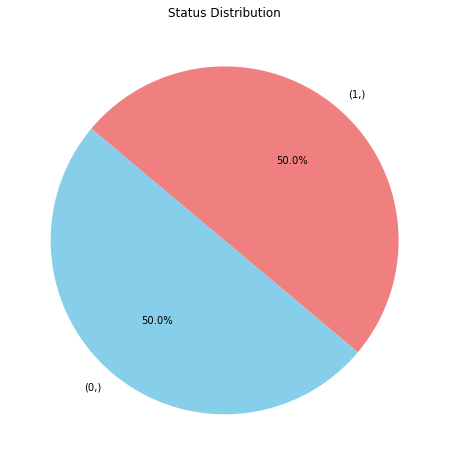

In [31]:
# Distribution after Random Over Sampling
status_counts = y2.value_counts()
print(status_counts)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Status Distribution')
plt.show()

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X2,y2,test_size=0.2, random_state=0)

# Logistic Regression
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
accuracy13 = accuracy_score(y_test, y_pred)
print(f'{model1} Accuracy: {accuracy13 * 100:.2f}%')

# K-Nearest Neighbors
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
accuracy23 = accuracy_score(y_test, y_pred)
print(f'{model2} Accuracy: {accuracy23 * 100:.2f}%')

# Deision Tree
model3 = DecisionTreeClassifier()
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)
accuracy33 = accuracy_score(y_test, y_pred)
print(f'{model3} Accuracy: {accuracy33 * 100:.2f}%')

# Random Forest
model4 = RandomForestClassifier()
model4.fit(X_train, y_train)
y_pred = model4.predict(X_test)
accuracy43 = accuracy_score(y_test, y_pred)
print(f'{model4} Accuracy: {accuracy43 * 100:.2f}%')

# SVM
model5 = SVC(kernel='linear')
model5.fit(X_train, y_train)
y_pred = model5.predict(X_test)
accuracy53 = accuracy_score(y_test, y_pred)
print(f'{model5} Accuracy: {accuracy53 * 100:.2f}%')

# Ensemble Model
ensemble_model = VotingClassifier(estimators=[
    ('dtree', model3),
    ('Random Forest', model4),
    ('KNN', model2)
], voting='soft') 
ensemble_model.fit(X_train, y_train)
y_pred = ensemble_model.predict(X_test)
accuracy63 = accuracy_score(y_test, y_pred)
print(f'Ensemble Model Accuracy: {accuracy63 * 100:.2f}%')

LogisticRegression() Accuracy: 69.11%
KNeighborsClassifier() Accuracy: 83.33%
DecisionTreeClassifier() Accuracy: 93.90%
RandomForestClassifier() Accuracy: 96.34%
SVC(kernel='linear') Accuracy: 70.73%
Ensemble Model Accuracy: 95.53%


## 3- SMOTE

In [33]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X,y)
X3 = X_resampled
y3 = y_resampled

# Converting numpy to pandas
X_names = df.columns[:20]
X3 = pd.DataFrame(X3, columns=X_names)
y3 = pd.DataFrame(y3, columns=['bug'])

df3 = pd.concat([X3, y3], axis=1)
df3.head()

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
0,0.279448,0.284940,-0.233430,-0.439618,0.611584,-0.031357,-0.349250,-0.346193,0.104066,-0.477542,...,1.169949,-0.484578,0.436985,-0.470063,0.995471,1.076983,0.100044,-0.521927,-0.419933,0
1,0.033806,-0.371148,5.136512,0.439833,-0.200569,-0.225585,0.623103,-0.046076,0.175928,-1.061262,...,1.169949,0.583562,0.418130,-0.956748,0.073927,0.858443,-0.417982,0.096431,0.186127,0
2,2.551641,-1.027237,-0.233430,1.008890,3.356098,2.136371,0.926964,0.654197,2.834831,-0.162068,...,-0.154241,-0.484578,-1.245500,-1.319745,-0.847616,-0.671338,0.296219,6.898371,2.397836,1
3,2.305998,0.284940,0.533705,1.474481,1.955836,1.813813,1.656229,0.354080,2.619245,-0.164327,...,-0.948755,0.049492,0.134223,-1.330501,1.917014,3.918004,-0.340636,1.796916,0.401409,0
4,-0.641711,-1.027237,-0.233430,-0.491351,-0.816684,-0.225585,-0.106162,-0.746349,-0.614556,1.245144,...,-0.948755,-0.484578,-1.245500,2.068228,-0.847616,-0.671338,-0.718771,-0.521927,-0.272506,0


bug
0      613
1      613
Name: count, dtype: int64


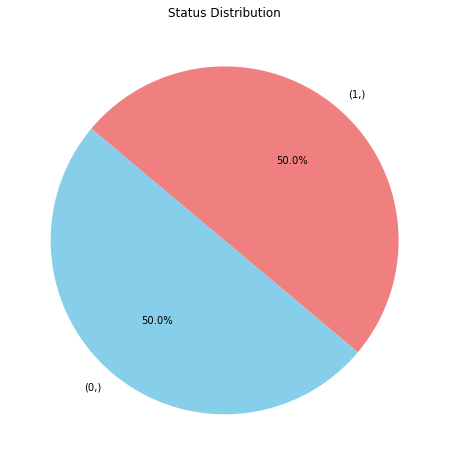

In [35]:
# Distribution after Random Under Sampling
status_counts = y3.value_counts()
print(status_counts)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Status Distribution')
plt.show()

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X3,y3,test_size=0.2, random_state=0)

# Logistic Regression
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
accuracy14 = accuracy_score(y_test, y_pred)
print(f'{model1} Accuracy: {accuracy14 * 100:.2f}%')

# K-Nearest Neighbors
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
accuracy24 = accuracy_score(y_test, y_pred)
print(f'{model2} Accuracy: {accuracy24 * 100:.2f}%')

# Deision Tree
model3 = DecisionTreeClassifier()
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)
accuracy34 = accuracy_score(y_test, y_pred)
print(f'{model3} Accuracy: {accuracy34 * 100:.2f}%')

# Random Forest
model4 = RandomForestClassifier()
model4.fit(X_train, y_train)
y_pred = model4.predict(X_test)
accuracy44 = accuracy_score(y_test, y_pred)
print(f'{model4} Accuracy: {accuracy44 * 100:.2f}%')

# SVM
model5 = SVC(kernel='linear')
model5.fit(X_train, y_train)
y_pred = model5.predict(X_test)
accuracy54 = accuracy_score(y_test, y_pred)
print(f'{model5} Accuracy: {accuracy54 * 100:.2f}%')

# Ensemble Model
ensemble_model = VotingClassifier(estimators=[
    ('dtree', model3),
    ('Random Forest', model4),
    ('KNN', model2)
], voting='soft') 
ensemble_model.fit(X_train, y_train)
y_pred = ensemble_model.predict(X_test)
accuracy64 = accuracy_score(y_test, y_pred)
print(f'Ensemble Model Accuracy: {accuracy64 * 100:.2f}%')

LogisticRegression() Accuracy: 70.33%
KNeighborsClassifier() Accuracy: 84.15%
DecisionTreeClassifier() Accuracy: 82.11%
RandomForestClassifier() Accuracy: 87.40%
SVC(kernel='linear') Accuracy: 73.17%
Ensemble Model Accuracy: 87.80%


In [48]:
from sklearn.ensemble import StackingClassifier


ensemble_sc = StackingClassifier(estimators=[
    ('dtree', model3),
    ('Random Forest', model4),
    ('KNN', model2)
]) 
ensemble_sc.fit(X_train, y_train)
y_pred = ensemble_sc.predict(X_test)
accuracy74 = accuracy_score(y_test, y_pred)
print(f'Ensemble Model Accuracy: {accuracy74 * 100:.2f}%')

Ensemble Model Accuracy: 90.61%


## 4- ADASYN

In [38]:
from imblearn.over_sampling import ADASYN
smote = ADASYN(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X,y)
X4 = X_resampled
y4 = y_resampled

# Converting numpy to pandas
X_names = df.columns[:20]
X4 = pd.DataFrame(X4, columns=X_names)
y4 = pd.DataFrame(y4, columns=['bug'])

df4 = pd.concat([X4, y4], axis=1)
df4.head()

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
0,0.279448,0.284940,-0.233430,-0.439618,0.611584,-0.031357,-0.349250,-0.346193,0.104066,-0.477542,...,1.169949,-0.484578,0.436985,-0.470063,0.995471,1.076983,0.100044,-0.521927,-0.419933,0
1,0.033806,-0.371148,5.136512,0.439833,-0.200569,-0.225585,0.623103,-0.046076,0.175928,-1.061262,...,1.169949,0.583562,0.418130,-0.956748,0.073927,0.858443,-0.417982,0.096431,0.186127,0
2,2.551641,-1.027237,-0.233430,1.008890,3.356098,2.136371,0.926964,0.654197,2.834831,-0.162068,...,-0.154241,-0.484578,-1.245500,-1.319745,-0.847616,-0.671338,0.296219,6.898371,2.397836,1
3,2.305998,0.284940,0.533705,1.474481,1.955836,1.813813,1.656229,0.354080,2.619245,-0.164327,...,-0.948755,0.049492,0.134223,-1.330501,1.917014,3.918004,-0.340636,1.796916,0.401409,0
4,-0.641711,-1.027237,-0.233430,-0.491351,-0.816684,-0.225585,-0.106162,-0.746349,-0.614556,1.245144,...,-0.948755,-0.484578,-1.245500,2.068228,-0.847616,-0.671338,-0.718771,-0.521927,-0.272506,0


bug
0      613
1      609
Name: count, dtype: int64


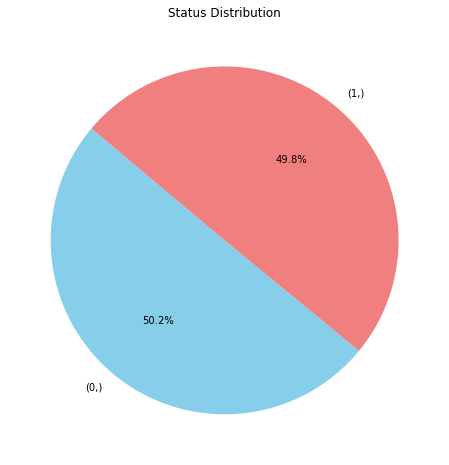

In [45]:
# Distribution after Random Under Sampling
status_counts = y4.value_counts()
print(status_counts)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Status Distribution')
plt.show()

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X4,y4,test_size=0.2, random_state=0)

# Logistic Regression
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
accuracy15 = accuracy_score(y_test, y_pred)
print(f'{model1} Accuracy: {accuracy15 * 100:.2f}%')

# K-Nearest Neighbors
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
accuracy25 = accuracy_score(y_test, y_pred)
print(f'{model2} Accuracy: {accuracy25 * 100:.2f}%')

# Deision Tree
model3 = DecisionTreeClassifier()
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)
accuracy35 = accuracy_score(y_test, y_pred)
print(f'{model3} Accuracy: {accuracy35 * 100:.2f}%')

# Random Forest
model4 = RandomForestClassifier()
model4.fit(X_train, y_train)
y_pred = model4.predict(X_test)
accuracy45 = accuracy_score(y_test, y_pred)
print(f'{model4} Accuracy: {accuracy45 * 100:.2f}%')

# SVM
model5 = SVC(kernel='linear')
model5.fit(X_train, y_train)
y_pred = model5.predict(X_test)
accuracy55 = accuracy_score(y_test, y_pred)
print(f'{model5} Accuracy: {accuracy55 * 100:.2f}%')

# Ensemble Model
ensemble_model = VotingClassifier(estimators=[
    ('dtree', model3),
    ('Random Forest', model4),
    ('KNN', model2)
], voting='soft') 
ensemble_model.fit(X_train, y_train)
y_pred = ensemble_model.predict(X_test)
accuracy65 = accuracy_score(y_test, y_pred)
print(f'Ensemble Model Accuracy: {accuracy65 * 100:.2f}%')

LogisticRegression() Accuracy: 71.43%
KNeighborsClassifier() Accuracy: 83.67%
DecisionTreeClassifier() Accuracy: 84.90%
RandomForestClassifier() Accuracy: 88.57%
SVC(kernel='linear') Accuracy: 72.24%
Ensemble Model Accuracy: 87.35%


In [46]:
from sklearn.ensemble import StackingClassifier


ensemble_sc = StackingClassifier(estimators=[
    ('dtree', model3),
    ('Random Forest', model4),
    ('KNN', model2)
]) 
ensemble_sc.fit(X_train, y_train)
y_pred = ensemble_sc.predict(X_test)
accuracy75 = accuracy_score(y_test, y_pred)
print(f'Ensemble Model Accuracy: {accuracy75 * 100:.2f}%')

Ensemble Model Accuracy: 90.61%


## GRID SEARCH

### GS ONLY

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

# Logistic Regression
# model1 = LogisticRegression()
# model1.fit(X_train, y_train)
# y_pred = model1.predict(X_test)
# accuracy11 = accuracy_score(y_test, y_pred)
# print(f'{model1} Accuracy: {accuracy11 * 100:.2f}%')

In [42]:
# K-Nearest Neighbors
model2 = GridSearchCV(KNeighborsClassifier(), {'n_neighbors': [5, 6, 7]})
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
accuracy21gs = accuracy_score(y_test, y_pred)
print(f'{model2} Accuracy: {accuracy21gs * 100:.2f}%')
print("Best params hash: {}".format(model2.best_params_))

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 6, 7]}) Accuracy: 82.55%
Best params hash: {'n_neighbors': 5}


In [43]:
pd.DataFrame(model2.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000601,0.000490,0.004436,0.000467,5,{'n_neighbors': 5},0.758333,0.789916,0.764706,0.831933,0.781513,0.785280,0.025929,1
1,0.000200,0.000399,0.004051,0.000120,6,{'n_neighbors': 6},0.775000,0.806723,0.781513,0.789916,0.764706,0.783571,0.014212,2
2,0.000643,0.000453,0.004628,0.001189,7,{'n_neighbors': 7},0.775000,0.798319,0.798319,0.789916,0.756303,0.783571,0.016077,2


In [44]:
# Deision Tree
model3 = GridSearchCV(DecisionTreeClassifier(random_state=21), {'max_depth': [3,5,8,12,15], 'min_samples_leaf': [5,8,12,15,20]})
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)
accuracy31gs = accuracy_score(y_test, y_pred)
print(f'{model3} Accuracy: {accuracy31gs * 100:.2f}%')
print("Best params hash: {}".format(model3.best_params_))

GridSearchCV(estimator=DecisionTreeClassifier(random_state=21),
             param_grid={'max_depth': [3, 5, 8, 12, 15],
                         'min_samples_leaf': [5, 8, 12, 15, 20]}) Accuracy: 76.51%
Best params hash: {'max_depth': 12, 'min_samples_leaf': 8}


In [45]:
pd.DataFrame(model3.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003214,0.000732,0.001028,0.000072,3,5,"{'max_depth': 3, 'min_samples_leaf': 5}",0.800000,0.764706,0.798319,0.831933,0.798319,0.798655,0.021270,6
1,0.002801,0.000382,0.000456,0.000456,3,8,"{'max_depth': 3, 'min_samples_leaf': 8}",0.808333,0.764706,0.781513,0.831933,0.798319,0.796961,0.022949,7
2,0.002596,0.000494,0.000844,0.000432,3,12,"{'max_depth': 3, 'min_samples_leaf': 12}",0.808333,0.764706,0.781513,0.815126,0.806723,0.795280,0.019076,9
3,0.002870,0.000279,0.000599,0.000490,3,15,"{'max_depth': 3, 'min_samples_leaf': 15}",0.833333,0.764706,0.781513,0.815126,0.806723,0.800280,0.024381,4
4,0.002666,0.000433,0.000584,0.000477,3,20,"{'max_depth': 3, 'min_samples_leaf': 20}",0.808333,0.764706,0.781513,0.823529,0.806723,0.796961,0.021022,8
5,0.004253,0.000400,0.001505,0.001547,5,5,"{'max_depth': 5, 'min_samples_leaf': 5}",0.800000,0.764706,0.781513,0.815126,0.798319,0.791933,0.017284,10
6,0.004065,0.000110,0.000394,0.000482,5,8,"{'max_depth': 5, 'min_samples_leaf': 8}",0.816667,0.764706,0.798319,0.840336,0.781513,0.800308,0.026437,3
7,0.003671,0.000549,0.000600,0.000490,5,12,"{'max_depth': 5, 'min_samples_leaf': 12}",0.808333,0.747899,0.773109,0.764706,0.781513,0.775112,0.019987,18
8,0.003497,0.000567,0.000401,0.000491,5,15,"{'max_depth': 5, 'min_samples_leaf': 15}",0.775000,0.747899,0.773109,0.764706,0.781513,0.768445,0.011590,25
9,0.003051,0.000098,0.001005,0.000006,5,20,"{'max_depth': 5, 'min_samples_leaf': 20}",0.775000,0.764706,0.756303,0.806723,0.781513,0.776849,0.017247,16


In [47]:
# Random Forest
model4 = GridSearchCV(RandomForestClassifier(random_state=21),
 {'max_depth': [10,15,20], 'max_samples': [0.05,0.1,0.2,0.5], 'n_estimators': [50,100,200], 'min_samples_leaf': [1,2,4]})
model4.fit(X_train, y_train)
y_pred = model4.predict(X_test)
accuracy41gs = accuracy_score(y_test, y_pred)
print(f'{model4} Accuracy: {accuracy41gs * 100:.2f}%')
print("Best params hash: {}".format(model4.best_params_))

GridSearchCV(estimator=RandomForestClassifier(random_state=21),
             param_grid={'max_depth': [10, 15, 20],
                         'max_samples': [0.05, 0.1, 0.2, 0.5],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [50, 100, 200]}) Accuracy: 84.56%
Best params hash: {'max_depth': 15, 'max_samples': 0.5, 'min_samples_leaf': 1, 'n_estimators': 100}


In [ ]:
pd.DataFrame(model4.cv_results_)

In [48]:
# SVM
model5 = GridSearchCV(SVC(), {'kernel':('linear', 'rbf'), 'C':[0.1,1,10,100], 'gamma':[1,0.1,0.01,0.001,0.0001]})
model5.fit(X_train, y_train)
y_pred = model5.predict(X_test)
accuracy51gs = accuracy_score(y_test, y_pred)
print(f'{model5} Accuracy: {accuracy51gs * 100:.2f}%')
print("Best params hash: {}".format(model5.best_params_))

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ('linear', 'rbf')}) Accuracy: 86.58%
Best params hash: {'C': 10, 'gamma': 1, 'kernel': 'linear'}


In [ ]:
pd.DataFrame(model5.cv_results_)

In [ ]:
# Ensemble Model
ensemble_model = VotingClassifier(estimators=[
    # ('log_reg', model1),
    ('Random Forest', model4),
    ('KNN', model2)
], voting='soft') 
ensemble_model.fit(X_train, y_train)
y_pred = ensemble_model.predict(X_test)
accuracy61gs = accuracy_score(y_test, y_pred)
print(f'Ensemble Model Accuracy: {accuracy61gs * 100:.2f}%')

# Dataset Shape

In [53]:
print("Imbalanced Dataset Shape : ", df.shape)
print("Random Under Sampler Dataset Shape : ", df1.shape)
print("Random Over Sampler Dataset Shape : ", df2.shape)
print("SMOTE Dataset Shape : ", df3.shape)
print("ADASYN Dataset Shape : ", df4.shape)

Imbalanced Dataset Shape :  (745, 21)
Random Under Sampler Dataset Shape :  (332, 21)
Random Over Sampler Dataset Shape :  (1158, 21)
SMOTE Dataset Shape :  (1158, 21)
ADASYN Dataset Shape :  (1166, 21)


# Comparing Accuracies

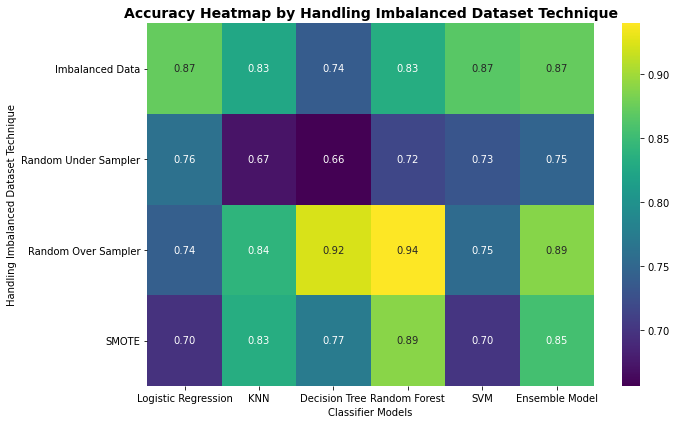

In [68]:
accuracies = {
    'Imbalanced Data': {
        'Logistic Regression': accuracy11,
        'KNN': accuracy21,
        'Decision Tree': accuracy31,
        'Random Forest': accuracy41,
        'SVM': accuracy51,
        'Ensemble Model': accuracy61
    },
    'Random Under Sampler': {
        'Logistic Regression': accuracy12,
        'KNN': accuracy22,
        'Decision Tree': accuracy32,
        'Random Forest': accuracy42,
        'SVM': accuracy52,
        'Ensemble Model': accuracy62
    },
    'Random Over Sampler': {
         'Logistic Regression': accuracy13,
        'KNN': accuracy23,
        'Decision Tree': accuracy33,
        'Random Forest': accuracy43,
        'SVM': accuracy53,
        'Ensemble Model': accuracy63
    },

    'SMOTE': {
         'Logistic Regression': accuracy14,
        'KNN': accuracy24,
        'Decision Tree': accuracy34,
        'Random Forest': accuracy44,
        'SVM': accuracy54,
        'Ensemble Model': accuracy64
    }
}

# Convert to DataFrame for easier plotting
data = pd.DataFrame(accuracies).T

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data, annot=True, cmap='viridis', cbar=True, fmt=".2f")
plt.title('Accuracy Heatmap by Handling Imbalanced Dataset Technique', fontsize=14, fontweight='bold')
plt.xlabel('Classifier Models')
plt.ylabel('Handling Imbalanced Dataset Technique')
plt.tight_layout()
plt.show()

# SMOTE + RFE

In [ ]:
from sklearn.feature_selection import RFE

# Recursive Feature Elimination
rfe = RFE(estimator=model3, n_features_to_select=8)
rfe = rfe.fit(X3, y3)

# Selected features
selected_features = X3.columns[rfe.support_]
print("Selected features by RFE:", selected_features)

X4= X3[selected_features]

X_train,X_test,y_train,y_test = train_test_split(X4,y3,test_size=0.2, random_state=0)

# Logistic Regression
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
accuracy15 = accuracy_score(y_test, y_pred)
print(f'{model1} Accuracy: {accuracy15 * 100:.2f}%')

# K-Nearest Neighbors
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
accuracy25 = accuracy_score(y_test, y_pred)
print(f'{model2} Accuracy: {accuracy25 * 100:.2f}%')

# Deision Tree
model3 = DecisionTreeClassifier()
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)
accuracy35 = accuracy_score(y_test, y_pred)
print(f'{model3} Accuracy: {accuracy35 * 100:.2f}%')

# Random Forest
model4 = RandomForestClassifier()
model4.fit(X_train, y_train)
y_pred = model4.predict(X_test)
accuracy45 = accuracy_score(y_test, y_pred)
print(f'{model4} Accuracy: {accuracy45 * 100:.2f}%')

# SVM
model5 = SVC(kernel='linear')
model5.fit(X_train, y_train)
y_pred = model5.predict(X_test)
accuracy55 = accuracy_score(y_test, y_pred)
print(f'{model5} Accuracy: {accuracy55 * 100:.2f}%')

# Ensemble Model
ensemble_model = VotingClassifier(estimators=[
    ('log_reg', model1),
    ('Random Forest', model4),
    ('KNN', model2)
], voting='soft') 
ensemble_model.fit(X_train, y_train)
y_pred = ensemble_model.predict(X_test)
accuracy65 = accuracy_score(y_test, y_pred)
print(f'Ensemble Model Accuracy: {accuracy65 * 100:.2f}%')

In [ ]:
accuracies = {
    
    'SMOTE': {
         'Logistic Regression': accuracy14,
        'KNN': accuracy24,
        'Decision Tree': accuracy34,
        'Random Forest': accuracy44,
        'SVM': accuracy54,
        'Ensemble Model': accuracy64
    },
    'RFE': {
         'Logistic Regression': accuracy15,
        'KNN': accuracy25,
        'Decision Tree': accuracy35,
        'Random Forest': accuracy45,
        'SVM': accuracy55,
        'Ensemble Model': accuracy65
    }
}

# Convert to DataFrame for easier plotting
data = pd.DataFrame(accuracies).T

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data, annot=True, cmap='viridis', cbar=True, fmt=".2f")
plt.title('Accuracy Heatmap SMOTE + RFE', fontsize=14, fontweight='bold')
plt.xlabel('Classifier Models')
plt.ylabel('SMOTE + RFE')
plt.tight_layout()
plt.show()

# Random Over Sampler + RFE

In [ ]:
from sklearn.feature_selection import RFE

# Recursive Feature Elimination
rfe = RFE(estimator=model3, n_features_to_select=8)
rfe = rfe.fit(X2, y2)

# Selected features
selected_features = X2.columns[rfe.support_]
print("Selected features by RFE:", selected_features)

X5= X2[selected_features]

X_train,X_test,y_train,y_test = train_test_split(X5,y2,test_size=0.2, random_state=0)

# Logistic Regression
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
accuracy16 = accuracy_score(y_test, y_pred)
print(f'{model1} Accuracy: {accuracy16 * 100:.2f}%')

# K-Nearest Neighbors
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
accuracy26 = accuracy_score(y_test, y_pred)
print(f'{model2} Accuracy: {accuracy26 * 100:.2f}%')

# Deision Tree
model3 = DecisionTreeClassifier()
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)
accuracy36 = accuracy_score(y_test, y_pred)
print(f'{model3} Accuracy: {accuracy36 * 100:.2f}%')

# Random Forest
model4 = RandomForestClassifier()
model4.fit(X_train, y_train)
y_pred = model4.predict(X_test)
accuracy46 = accuracy_score(y_test, y_pred)
print(f'{model4} Accuracy: {accuracy46 * 100:.2f}%')

# SVM
model5 = SVC(kernel='linear')
model5.fit(X_train, y_train)
y_pred = model5.predict(X_test)
accuracy56 = accuracy_score(y_test, y_pred)
print(f'{model5} Accuracy: {accuracy56 * 100:.2f}%')

# Ensemble Model
ensemble_model = VotingClassifier(estimators=[
    ('log_reg', model1),
    ('Random Forest', model4),
    ('KNN', model2)
], voting='soft') 
ensemble_model.fit(X_train, y_train)
y_pred = ensemble_model.predict(X_test)
accuracy66 = accuracy_score(y_test, y_pred)
print(f'Ensemble Model Accuracy: {accuracy66 * 100:.2f}%')

In [ ]:
accuracies = {
    'Random Over Sampler': {
         'Logistic Regression': accuracy13,
        'KNN': accuracy23,
        'Decision Tree': accuracy33,
        'Random Forest': accuracy43,
        'SVM': accuracy53,
        'Ensemble Model': accuracy63
    },

    'RFE': {
         'Logistic Regression': accuracy16,
        'KNN': accuracy26,
        'Decision Tree': accuracy36,
        'Random Forest': accuracy46,
        'SVM': accuracy56,
        'Ensemble Model': accuracy66
    }
}

# Convert to DataFrame for easier plotting
data = pd.DataFrame(accuracies).T

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data, annot=True, cmap='viridis', cbar=True, fmt=".2f")
plt.title('Accuracy Heatmap by ROS + RFE', fontsize=14, fontweight='bold')
plt.xlabel('Classifier Models')
plt.ylabel('ROS + RFE')
plt.tight_layout()
plt.show()